# 战略资产配置

**战略资产配置(Strategic Asset Allocation, SAA)**, 也称为**政策资产配置(Policy Asset Allocation)**，战略资产配置的结果通常是一系列大类资产的目标配置比例以及各配置比例的浮动区间。战略资产配置是在一个较长时期内以追求长期回报为目标的资产配置，时间跨度一般是三到五年，甚至更长。战略资产配置的基础假设是各个大类资产的风险和收益长期内收敛到其均值水平，因此只需关注资产的长期平均收益和风险，并据此确定配置比例，无需根据市场的短期波动作出调整。

SAA 决定了组合的长期预期收益和风险，但这不包含 TAA 和投资标的选择带来的风险收益。大类资产能够提供对不同 beta 的暴露度或者对不同因子的暴露度，比如股票市场、货币、利率、通胀、信用利差、期限结构等等，beta 为资产提供的是被动的、系统性的风险，这种风险能够得到市场给予的收益补偿，而这种收益补偿与组合经理的投资管理能力或者主动管理过程没有关系，也不需要为此额外支付费用。每类资产都有各自不同的一组 beta，SAA 就是在考虑投资目标和投资限制的同时，决定如何通过资产类别的组合来获取不同的 beta 暴露。


战略资产配置的一般流程：
1. 确定投资目标（预期收益）、风险偏好以及投资期限；
2. 明确投资范围，确定可投资的大类资产类别；
3. 分析并预测大类资产在投资期限内的收益、风险以及相关性；
4. 选择并运用资产配置模型，确定大类资产的配置比例；
5. 确定再平衡策略

## 资金性质

投资目标、风险偏好以及投资期限由资金性质决定，资本市场环境以及受托人的投资管理能力也是影响投资目标和风险偏好的因素。

## 投资范围

理论上，可投资的大类资产类别越多越好，多样化可以分散投资风险。但是过多的资产类别会导致投资管理的困难，而且配置于某类资产的比例需要足够大才能凸显其风险收益特征，从而达到分散投资风险的目的。另外，增加大类资产的边际分散贡献是递减的，对于一个分散度已经很好的组合，增加一小部分奇异资产只会增加组合的复杂性。实际的资产配置中，资产类别不宜过多，一般为 5 到 10 种，并且应该尽量选择风险收益特征差异大、相关性低的资产。

在做 SAA 分析时，往往要用某只具有代表性的指数表征一类资产，但是一些非传统资产没有合适的指数可用，这是分析的一大挑战。

### 大类资产的历史表现

每类资产都用一个指数代表，即假设被动式、买入持有的投资方式，所有股息和利息都再投资，没有交易成本和其他费用，也没有任何额外收益。

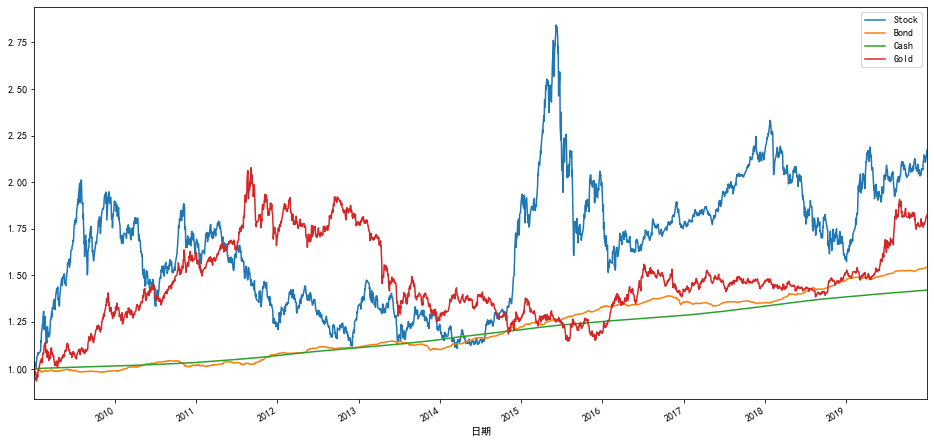

In [7]:
# 读取资产价格数据
import numpy as np
import pandas as pd

AssetPrice = pd.read_csv("./csv/AssetPrice0.csv", index_col=0, header=0, parse_dates=True, infer_datetime_format=True, encoding="utf-8")
AssetPrice = AssetPrice.rename(columns={"000300.SH": "Stock", "H11001": "Bond", "H11025": "Cash", "AUCI.SHF": "Gold"})
# AssetPrice = AssetPrice.rename(columns={"000300.SH": "CN_Stock", "H11001": "Bond", "H11025": "Cash", "AUCI.SHF": "Gold", ".GSPC.NYSE": "US_Stock"})
# AssetPrice.pop("HSI.HK")
# AssetPrice = AssetPrice.rename(columns={"000300.SH": "CN_Stock", "H11001": "Bond", "H11025": "Cash", "AUCI.SHF": "Gold", ".GSPC.NYSE": "US_Stock", "HSI.HK": "HK_Stock"})
# AssetPrice = AssetPrice.rename(columns={"000300.SH": "CN_Big_Stock", "000905.SH": "CN_Mid_Stock", "000852.SH": "CN_Small_Stock", "H11006": "T_Bond", "H11007": "F_Bond", "H11008": "C_Bond", "H11025": "Cash", "AUCI.SHF": "Gold", ".GSPC.NYSE": "US_Stock", "HSI.HK": "HK_Stock"})
(AssetPrice / AssetPrice.iloc[0]).plot(figsize=(16, 8));

# 年度收益，TODO

In [8]:
# 历史表现
# 年化收益率
Return = (AssetPrice.iloc[-1] / AssetPrice.iloc[0]) ** (365 / (AssetPrice.index[-1] - AssetPrice.index[0]).days) - 1
# 协方差矩阵
Cov = AssetPrice.pct_change().cov() * 252
# 相关系数矩阵
Volatility = pd.Series(np.diag(Cov.values)**0.5, index=Cov.index)
Rho = pd.DataFrame((Cov.values / Volatility.values).T / Volatility.values, index=Cov.index, columns=Cov.columns)

# Formatters = [lambda x: '{0: .2f}%'.format(x*100)]*2 + [lambda x: '{0: .2f}'.format(x)]*7
Summary = pd.DataFrame({"Annual Return": Return, "Volatility": Volatility, "Sharpe Ratio(rf=0)": Return / Volatility})
display(Summary.merge(Rho, left_index=True, right_index=True))

,Annual Return,Volatility,Sharpe Ratio(rf=0),Stock,Bond,Cash,Gold
Stock,0.073278,0.241582,0.303324,1.000000,-0.014142,0.010884,0.072357
Bond,0.040356,0.014729,2.739881,-0.014142,1.000000,0.149490,0.013026
Cash,0.032490,0.001726,18.824372,0.010884,0.149490,1.000000,0.034685
Gold,0.056331,0.157193,0.358355,0.072357,0.013026,0.034685,1.000000


大类资产的历史表现和时间区间相关性很大，而且承担风险并不总能得到相应补偿。（如果总能得到补偿，也就不叫风险了）

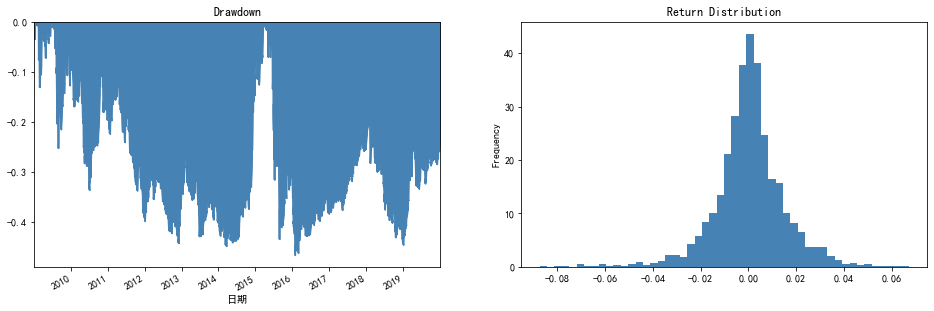

In [9]:
# 单资产分析
import QuantStudio.api as QS

TargetAsset = "Stock"
# 名义收益率和经通胀调整的实际收益率，TODO

import matplotlib.pyplot as plt
Fig, Axes = plt.subplots(1,2,figsize=(16, 5))
# 回撤
Drawdown = pd.Series(QS.Tools.Strategy.calcDrawdown(AssetPrice[TargetAsset].values)[0], index=AssetPrice.index)
Drawdown.plot(kind="area", title="Drawdown", ax=Axes[0], color="steelblue");
# 收益率分布
AssetPrice[TargetAsset].pct_change().plot(kind="hist", bins=50, density=True, title="Return Distribution", ax=Axes[1], color="steelblue");

### 投资组合

投资组合是否能够产生具有吸引力的风险收益特征主要取决于大类资产之间的相关性。分散投资能够降低风险（个别风险），但经验丰富的投资者会选择承受个别风险，对于没有能力选择个别风险的投资者，分散投资是最好的选择。分散投资是为数不多的不用额外支付保险费或者对冲费就能降低风险的方法。如果投资目标是发大财，那投资组合还是集中一些好；如果是保值增值，那就应该选择分散投资。

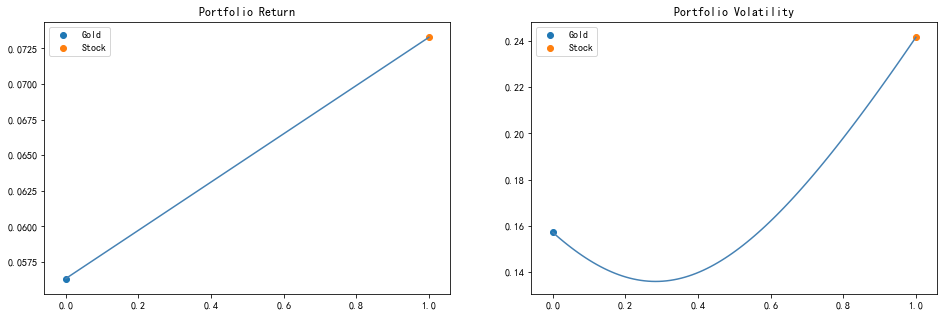

In [10]:
# 两个资产的投资组合的风险和收益特征
import matplotlib.pyplot as plt

a1, a2 = "Stock", "Gold"
# 资产 1 的权重
w = np.linspace(0, 1, 100)
r = w * Return[a1] + (1-w) * Return[a2]
sigma = (w**2 * Volatility[a1]**2 + (1-w)**2 * Volatility[a2]**2 + 2*w*(1-w)*Rho.loc[a1, a2]*Volatility[a1]*Volatility[a2]) ** 0.5

Fig, Axes = plt.subplots(1,2,figsize=(16, 5))
Axes[0].plot(w, r, color="steelblue", linewidth=1.5)
Axes[0].scatter(0, Return[a2], label=a2)
Axes[0].scatter(1, Return[a1], label=a1)
Axes[0].set_title("Portfolio Return")
Axes[0].legend(loc="best")
Axes[1].plot(w, sigma, color="steelblue", linewidth=1.5)
Axes[1].scatter(0, Volatility[a2], label=a2)
Axes[1].scatter(1, Volatility[a1], label=a1)
Axes[1].set_title("Portfolio Volatility")
Axes[1].legend(loc="best");

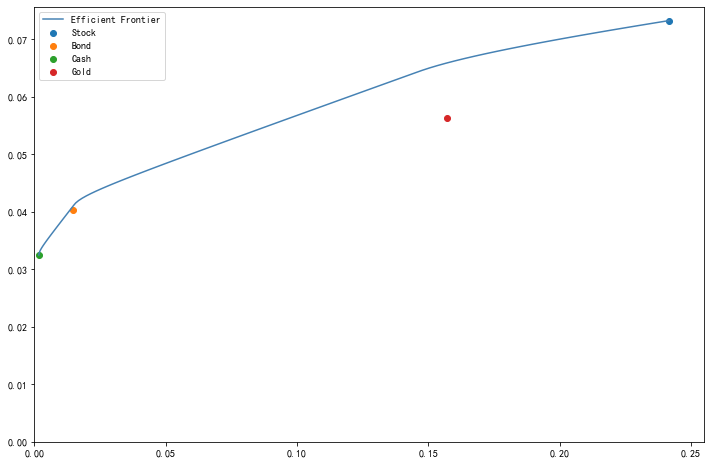

In [11]:
# 有效前沿
import PortfolioModel

r, sigma = PortfolioModel.calcEfficientFrontier(Cov.values, Return.values, allow_short=False)

import matplotlib.pyplot as plt
Fig, Axes = plt.subplots(1, 1, figsize=(12, 8))
Axes.plot(sigma, r, label="Efficient Frontier", color="steelblue")
for i, iAsset in enumerate(Return.index):
    Axes.scatter(Cov.values[i, i]**0.5, Return.values[i], label=Return.index[i])
Axes.set_xlim(left=0)
Axes.set_ylim(bottom=0)
Axes.legend(loc="best");

# 资产配置模型

## 耶鲁模型

耶鲁大学基金会的首席投资官 Swensen 于 2000 年著的《Pioneering Portfolio Management: An Unconventional Approach to Institutional Investment》中提出了耶鲁模型，耶鲁模型将资产等分为 5-6 份，每份投资于一类大类资产，大类资产之间的相关性很低。同时，该模型认为由于获得流动性是以牺牲收益为代价的，所以不应该配置流动性资产，耶鲁大学基金只配置于非流动性资产，比如私募股权。

## 基于风险的大类资产配置

基于风险程度，将所有的资产分成三类：
* 安全类（Safe Bucket）：目标就是安全第一，无法忍受任何损失或者风险。对于个人投资者，一般是其毕生储蓄，用于养老；对于机构投资者，主要是为了匹配负债或者应对监管要求的资产。
* 市场风险类（Market Risk Bucket）：这类风险是投资者可接受的，投资这类资产的目的是为了实现长期资本真实增值。市场风险类资产应该在不同的 beta 和 alpha 之间分散投资，业绩比较基准也要与资产的投资目标相匹配
* 风险资产类（Risky Bucket）：实际上这是一种投机型风险，这类资产在投资者的个人财富中比例较小，可能不到 20%，其需要投资者有相应的风险承担意愿和风险承担能力，其投资标的是集中的。风险类资产一般没有比较基准，表现应该使用绝对收益形式。

投资者可以在三类资产中进行资金转换。基于风险的资产配置方法帮助投资者整体的考量自己的所有财产，并针对每一类资产分别明确风险水平和投资技术（这种方法实际上是“心理账户”的认知偏差的延伸）。

# 参考文献

[<a id="cit-Qutke:2018" href="#call-Qutke:2018">况客研究:2018</a>] 况客研究, FOF投资的量化分析, 中国金融出版社, 2018.

[<a id="cit-Lustig:2016" href="#call-Lustig:2016">Lustig:2016</a>] Yoram Lustig 著, 孙静, 郑志勇, 李韵 译, 资产配置投资实践, 电子工业出版社, 2016.